### Aim: To implement a Machine Learning Classification model using a K Nearest Neighbors  Classifier algorithm and enhance the model by K Fold and GridSearchCV cross-validation.

In [73]:
import numpy as np 
import pandas as pd 
from sklearn.neighbors import KNeighborsClassifier 
from sklearn.model_selection import train_test_split 
from sklearn.model_selection import train_test_split 
import matplotlib.pyplot as plt



In [74]:
data = pd.read_csv(r"Practical5.csv")
X = data.iloc[:, [1, 2, 3, 4, 5, 6, 7]].values
y = data.iloc[:, -1].values

In [75]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()
X[:,0] = le.fit_transform(X[:,0])

In [76]:
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=42)

In [77]:
knn = KNeighborsClassifier(n_neighbors=13) 

In [78]:
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=13)

In [79]:
y_pred=knn.predict(X_test)
print(knn.predict(X_test)) 

[0 0 0 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 0 1 0 0 0 0 1 0 0 0 0 1 0 1 1 0 1 1
 0 0 1 0 0 1 1 0 1 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 0 0 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0 1 0 0 1 0 1 1 0 0 0 0 0 0 1 0 0 1 0 1 0 0 0 0 0 1 0 0 1 0 1 0
 1 0 1 0 0 1 0 0 0 0 0 0 0 0 1 0 1 1 1 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0
 0 1 0 0 0 0]


In [80]:
from sklearn.metrics import confusion_matrix  
cm= confusion_matrix(y_test,y_pred) 
print(cm) 

[[86 13]
 [21 34]]


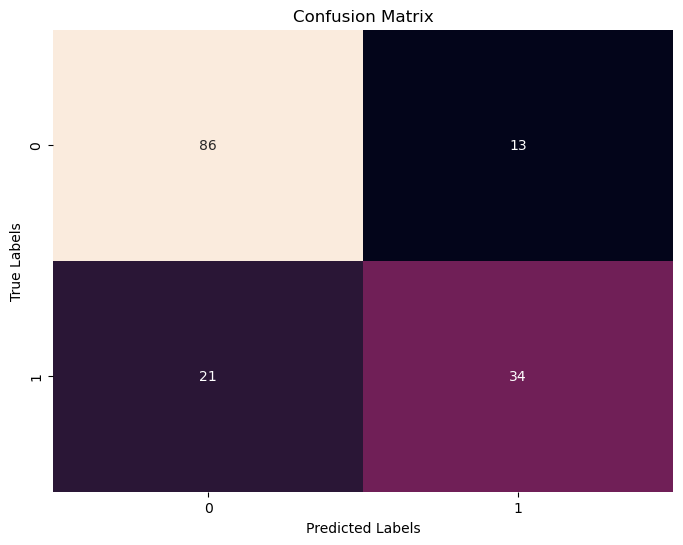

In [81]:
import seaborn as sns
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()

In [82]:
X_train, X_test, y_train, y_test = train_test_split( 
             X, y, test_size = 0.2, random_state=1)

In [83]:
from sklearn.model_selection import KFold
from sklearn.metrics import precision_recall_fscore_support
from sklearn.metrics import confusion_matrix  
cv = KFold(n_splits=15)
for train_ix, test_ix in cv.split(X):
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    knn = KNeighborsClassifier(n_neighbors=7)
    knn.fit(X_train, y_train) 
    y_pred=knn.predict(X_test)
    print(knn.predict(X_test))
    cm= confusion_matrix(y_test,y_pred) 
    print(cm)
    precision, recall, f1_score,_ = precision_recall_fscore_support(y_test, y_pred)
    print("Precision:", precision)
    print("Recall:", recall)
    print("F1 Score:", f1_score) 

[0 0 1 0 1 0 0 1 1 0 0 1 0 1 1 0 0 0 0 0 0 0 1 0 1 0 1 0 1 0 1 1 0 0 1 0 0
 0 0 0 0 1 1 1 1 1 1 0 0 0 0 0]
[[19  8]
 [13 12]]
Precision: [0.59375 0.6    ]
Recall: [0.7037037 0.48     ]
F1 Score: [0.6440678  0.53333333]
[0 1 1 0 1 0 1 0 0 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 1 0 0 0 0 0 1 0 0 0 1
 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0]
[[34  5]
 [ 6  7]]
Precision: [0.85       0.58333333]
Recall: [0.87179487 0.53846154]
F1 Score: [0.86075949 0.56      ]
[0 0 0 1 0 0 1 1 0 0 1 1 0 0 0 0 1 0 0 0 0 0 0 0 0 0 1 0 1 0 0 0 0 0 0 0 0
 1 0 1 0 0 0 0 1 0 0 0 1 1 1 1]
[[30  4]
 [ 7 11]]
Precision: [0.81081081 0.73333333]
Recall: [0.88235294 0.61111111]
F1 Score: [0.84507042 0.66666667]
[0 0 0 1 1 0 0 0 0 1 0 1 0 0 0 0 0 0 0 1 0 1 1 0 0 0 0 0 0 1 1 0 0 1 0 0 1
 1 0 0 0 0 0 0 0 0 0 0 1 0 1]
[[27  4]
 [10 10]]
Precision: [0.72972973 0.71428571]
Recall: [0.87096774 0.5       ]
F1 Score: [0.79411765 0.58823529]
[1 0 1 0 0 1 0 0 0 0 0 0 1 1 1 0 1 0 0 0 1 1 0 0 0 0 0 0 1 1 1 1 0 0 0 0 0
 1 1 1 1 0 0 1 0 0 0 0 0 0 

In [84]:
from sklearn.model_selection import KFold, GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import confusion_matrix, precision_recall_fscore_support
cv = KFold(n_splits=12)
param_grid = {'n_neighbors': list(range(1, 21, 2))}
knn = KNeighborsClassifier()
grid_search = GridSearchCV(estimator=knn, param_grid=param_grid, cv=cv, scoring='accuracy')
for train_ix, test_ix in cv.split(X):
    X_train, X_test = X[train_ix, :], X[test_ix, :]
    y_train, y_test = y[train_ix], y[test_ix]
    grid_search.fit(X_train, y_train)
    best_knn = grid_search.best_estimator_
    y_pred = best_knn.predict(X_test)
    cm = confusion_matrix(y_test, y_pred)
    precision, recall, f1_score, _ = precision_recall_fscore_support(y_test, y_pred)
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

Best parameters found by GridSearchCV: {'n_neighbors': 17}


In [85]:
print("Best parameters found by GridSearchCV:", grid_search.best_params_)

Best parameters found by GridSearchCV: {'n_neighbors': 17}


In [86]:
knn = KNeighborsClassifier(n_neighbors=17) 

In [87]:
knn.fit(X_train, y_train) 

KNeighborsClassifier(n_neighbors=17)

In [88]:
y_pred=knn.predict(X_test)

In [89]:
cm= confusion_matrix(y_test,y_pred) 
print(cm) 

[[34  5]
 [ 9 16]]


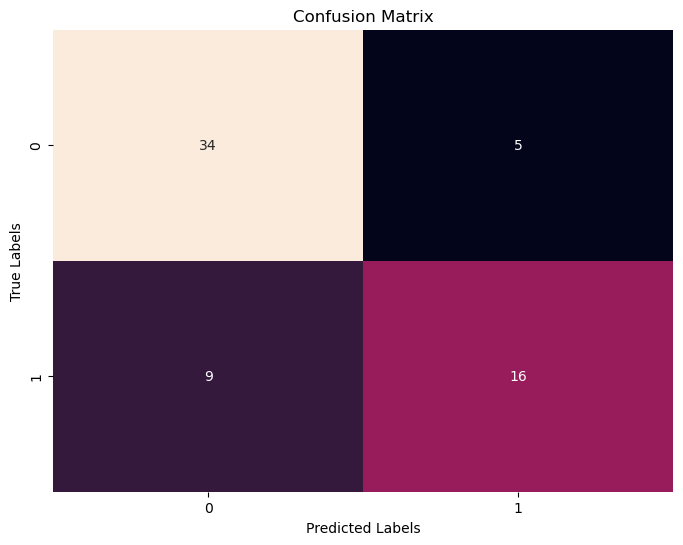

In [90]:
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')
plt.show()